In [7]:
from bs4 import BeautifulSoup as bs
import requests as req

In [109]:
url = "https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BC%D0%B8%D1%8F_%C2%AB%D0%9E%D1%81%D0%BA%D0%B0%D1%80%C2%BB_%D0%B7%D0%B0_%D0%BB%D1%83%D1%87%D1%88%D1%83%D1%8E_%D0%BC%D1%83%D0%B6%D1%81%D0%BA%D1%83%D1%8E_%D1%80%D0%BE%D0%BB%D1%8C"
page = req.get(url)
soup = bs(page.text, 'html')

In [115]:
table = soup.find_all('table', class_ = 'wikitable')[8]

In [127]:
titles = soup.find_all('th')[12:17]

In [128]:
column_titles = [title.text.strip() for title in titles]
column_titles

['Церемония', 'Фото лауреата', 'Актёр', 'Фильм', 'Роль']

In [129]:
import pandas as pd

In [146]:
df = pd.DataFrame(columns = column_titles[2:])
df

,Актёр,Фильм,Роль


In [159]:
column_data = table.find_all('tr')

In [150]:
for row in column_data[1:]: 
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data][-3:]
    length = len(df)
    df.loc[length] = individual_row_data

In [151]:
df

,Актёр,Фильм,Роль
0,★ Рассел Кроу,«Гладиатор»,Максимус
1,• Хавьер Бардем,«Пока не наступит ночь»,Рейнальдо Аренас
2,• Джеффри Раш,«Перо маркиза де Сада»,Маркиз де Сад
3,• Эд Харрис,«Поллок»,Джексон Поллок
4,• Том Хэнкс,«Изгой»,Чак Ноланд
5,★ Дензел Вашингтон,«Тренировочный день»,детектив Алонзо Харрис
6,• Рассел Кроу,«Игры разума»,Джон Нэш
7,• Шон Пенн,«Я — Сэм»,Сэм Доусон
8,• Уилл Смит,«Али»,Мохаммед Али
9,• Том Уилкинсон,«В спальне»,Мэтт Фоулер


In [158]:
df.to_csv(r'C:\Users\Admin\Desktop\Data sets\Academy Awards (Men 2001—2010).csv', index = False)
df.to_excel(r'C:\Users\Admin\Desktop\Data sets\Academy Awards (Men 2001—2010).xlsx', index = False)

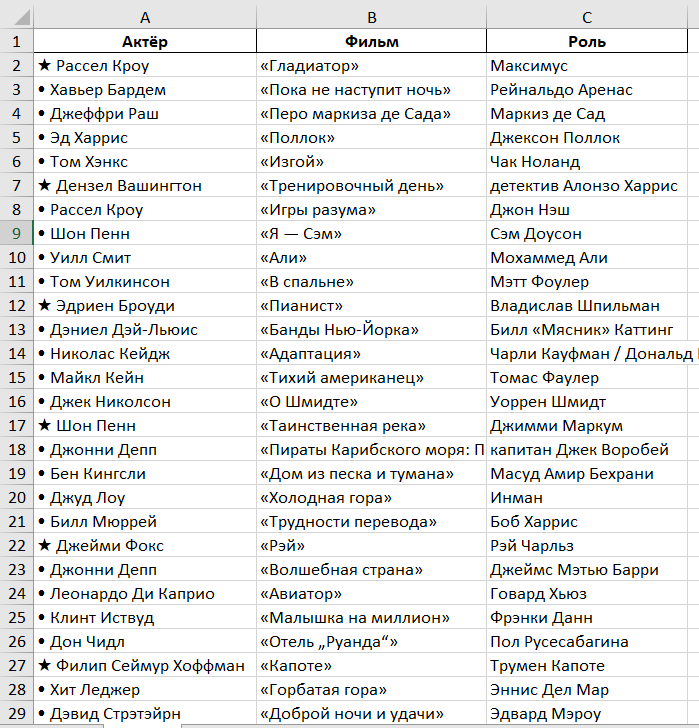